# Data analisys on Covid-19 

The basic idea here is following the trends of hospedalized cases, as they seems to be the more reliable data available today

In [1]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as pyplot
import glob

path = "COVID-19/dati-regioni"
all_files = glob.glob(path + "/*.csv")

datasets = []

for filename in all_files:
    data = pd.read_csv(filename)
    data['data'] = pd.to_datetime(data['data']).dt.normalize()
    valid_cases = data['totale_ospedalizzati'] + data['dimessi_guariti'] + data['deceduti']
    data['totali_accertati'] = valid_cases
    datasets.append(data)

df_italy =  pd.concat(datasets, axis=0, ignore_index=True)   
df_italy = df_italy.sort_values(by=['data'])

display(df_italy.info())
display(df_italy.head())
#display(data[['codice_regione', 'denominazione_regione']])valid_cases = data['totale_ospedalizzati'] + data['dimessi_guariti'] + data['deceduti']
%matplotlib inline

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 209 to 0
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   data                         1449 non-null   datetime64[ns]
 1   stato                        1449 non-null   object        
 2   codice_regione               1449 non-null   int64         
 3   denominazione_regione        1449 non-null   object        
 4   lat                          1449 non-null   float64       
 5   long                         1449 non-null   float64       
 6   ricoverati_con_sintomi       1449 non-null   int64         
 7   terapia_intensiva            1449 non-null   int64         
 8   totale_ospedalizzati         1449 non-null   int64         
 9   isolamento_domiciliare       1449 non-null   int64         
 10  totale_attualmente_positivi  1449 non-null   int64         
 11  nuovi_attualmente_positivi   1449 non-null  

None

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en,totali_accertati
209,2020-02-24,ITA,5,Veneto,45.434905,12.338452,12,4,16,16,32,32,0,1,33,2200,NaN,NaN,17
191,2020-02-24,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1,NaN,NaN,0
192,2020-02-24,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1,NaN,NaN,0
193,2020-02-24,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10,NaN,NaN,0
194,2020-02-24,ITA,8,Emilia Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,148,NaN,NaN,12


count all the cases that needs hospitalization for a sig

In [87]:
import numpy as np
pd.set_option('mode.chained_assignment', None)
def plot_region(region_name):
    final = df_italy[['data','denominazione_regione', 'ricoverati_con_sintomi','terapia_intensiva','dimessi_guariti','deceduti','totali_accertati']].copy()
    region = final[final['denominazione_regione']==region_name]
    region.drop_duplicates(subset='data',inplace=True)
    region['day'] = range(1,len(region)+1)
    x = region['day'].tolist()
    y = region['totali_accertati'].diff().tolist()
    pyplot.figure(figsize=[13.0,8.0])
    pyplot.grid(b=True, color='g')
    pyplot.plot(x,y)
    z = np.polyfit(x, y, 1)
    display(z)
    x1 = np.linspace(0,4*np.pi);
    y1 = np.polyval(z,x1);
    pyplot.plot(x1,y1)


array([nan, nan])

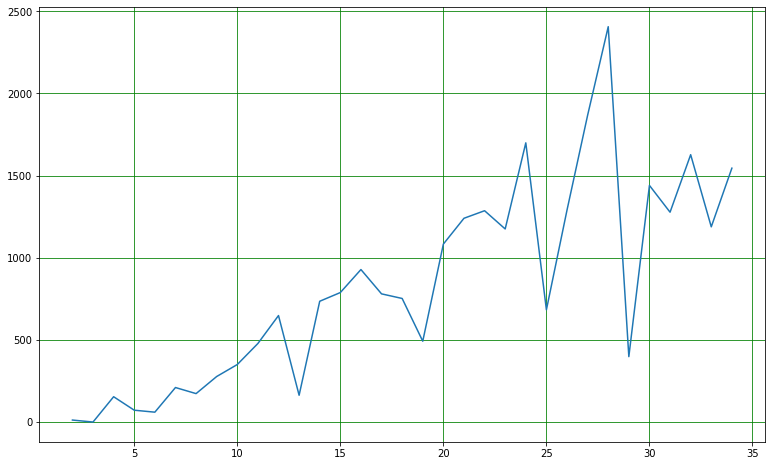

In [88]:
plot_region('Lombardia')

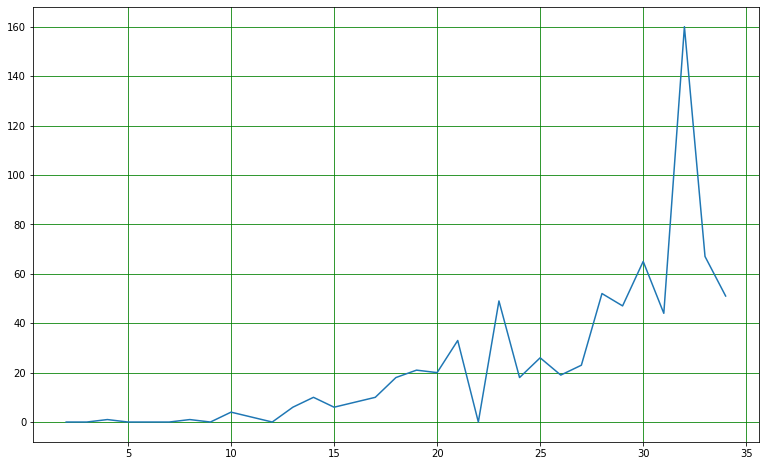

In [41]:
plot_region("Puglia")

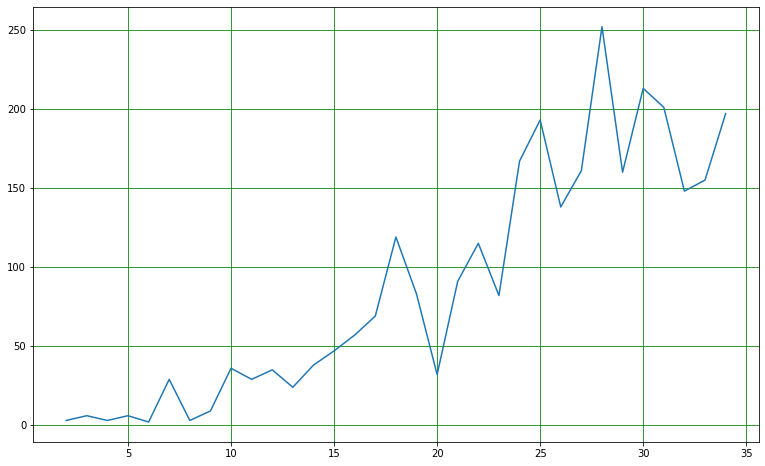

In [42]:
plot_region("Veneto")

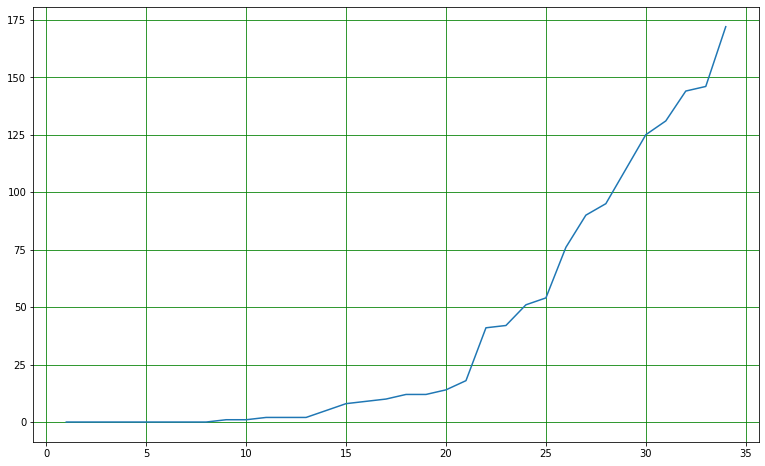

In [12]:
plot_region("Sardegna")